In [18]:
import yfinance as yf
import matplotlib.pyplot as plt
import time
import smtplib
from email.message import EmailMessage

In [20]:
def send_email(subject, body, to_email): 
    from_email = " " #from email_id
    from_password = " " #app password

    msg = EmailMessage()
    msg["From"] = from_email
    msg["To"] = to_email
    msg["Subject"] = subject

    msg.set_content(body)

    try:
        server = smtplib.SMTP("smtp.gmail.com", 587)
        server.starttls()
        server.login(from_email, from_password)
        server.send_message(msg)
        print(f"Email sent to {to_email}")
    except Exception as e:
        print(f"Error sending email: {e}")

Enter your stock symbol eg; AAPL MSFT AAPL
Enter your Target value 3
enter your email eg; recipient_email@gmail.com jhdesigns67@gmail.com


Current price of AAPL: $228.01
Email sent to jhdesigns67@gmail.com


(array([20113.20833333, 20115.20833333, 20117.20833333, 20119.20833333,
        20120.20833333, 20122.20833333]),
 [Text(20113.208333333332, 0, '2025-01-25'),
  Text(20115.208333333332, 0, '2025-01-27'),
  Text(20117.208333333332, 0, '2025-01-29'),
  Text(20119.208333333332, 0, '2025-01-31'),
  Text(20120.208333333332, 0, '2025-02-01'),
  Text(20122.208333333332, 0, '2025-02-03')])

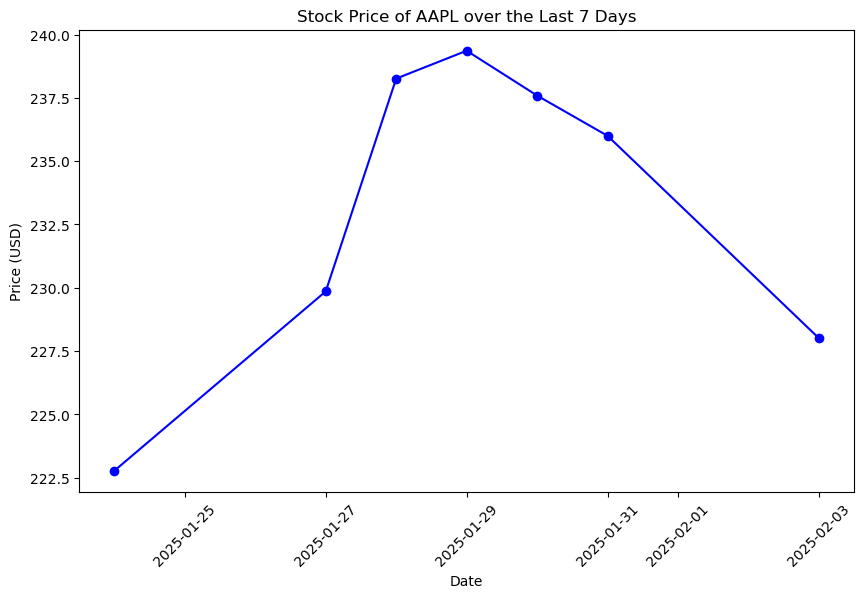

In [22]:
symbol = input("Enter your stock symbol eg; AAPL MSFT")  #company symbol
target_price = int(input("Enter your Target value")) # target price to reach
to_email=input("enter your email eg; recipient_email@gmail.com")
while True:
    try:
        stock = yf.Ticker(symbol)
        current_price = stock.history(period="1d")["Close"].iloc[-1]
        print(f"Current price of {symbol}: ${current_price:.2f}")
        if current_price >= target_price:
            subject = f"ALERT: {symbol} Price Alert!"
            body = f"The stock {symbol} has reached ${current_price:.2f}, crossing your target of ${target_price}."
            send_email(subject, body, to_email)
            break
        time.sleep(10)
    except:
        print(f"Error fetching stock price: {e}")
        time.sleep(30)
data=stock.history(period="7d")

plt.figure(figsize=(10, 6))
plt.plot(data.index, data["Close"], marker='o', color='b', label=f"{symbol} Closing Price")
plt.title(f"Stock Price of {symbol} over the Last 7 Days")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)